# Processamento Digital de Imagens
# lista02 - Filtragem
## Estudante: Marcelo de Souza Pena
## Professor: Francisco Zampirolli

**Instruções:** Os algoritmos deverão ser desenvolvidos no ipython notebook e entregues de forma digital no moodle (pdf - sugestão: altere este arquivo ipynb). Um único arquivo para os 6 exercícios abaixo.


In [1]:
# criando uma função
def showfig(image, ucmap):
    # para visualizar uma imagem neste ipython notebook
    # não funciona quando usa o shell
    imgplot=plt.imshow(image, ucmap)
    
# comentar esta linha para rodar do shell
get_ipython().magic(u'matplotlib inline')
if 0: 
    !pip install opencv-python==3.4.3.18
    !pip install matplotlib==3.1.1
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Exercício 1
O arquivo “NoisyGull.pgm” contém uma imagem corrompida por ruídos. Desenvolva um algoritmo  que permita aplicar o filtro da média com kernel de tamanhos 2×2, 5×5, 10×10 e 20×20. Mostre o resultado de cada kernel aplicado e quantifique os resultados através do erro médio quadrático. 


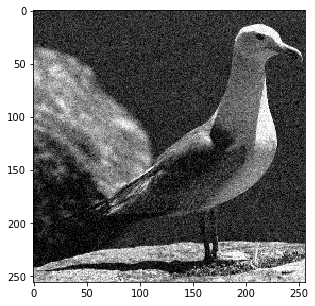

In [18]:
# Load ando Show an color image in grayscale
img6 = cv2.imread('../imgs/NoisyGull.pgm')
plt.figure(figsize=(5,5))
showfig(img6,"gray")

def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err
# https://www.pyimagesearch.com/2014/09/15/python-compare-two-images/

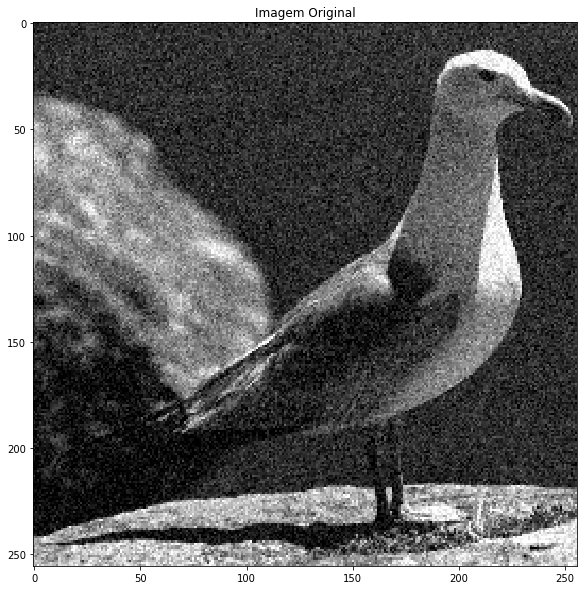

In [19]:
img = cv2.imread('../imgs/NoisyGull.pgm')
plt.figure(figsize=(10,10))
plt.title('Imagem Original')
showfig(img,"gray")

Mean Squared Error: 1383.0682067871094


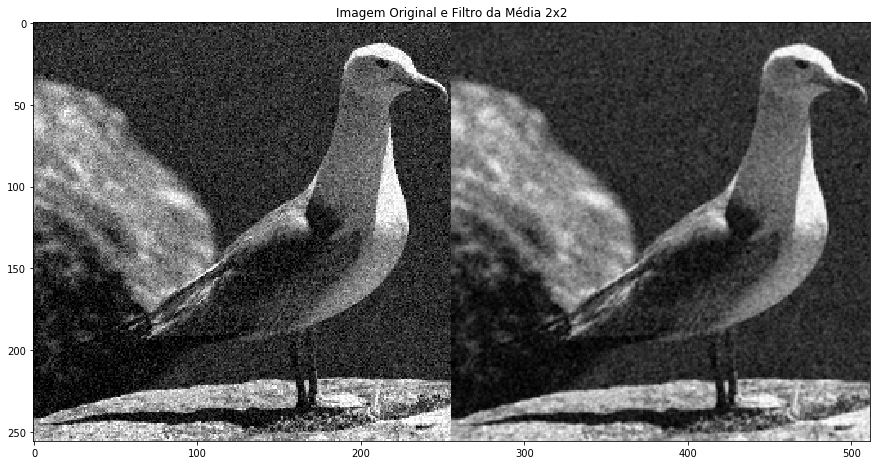

In [30]:
plt.figure(figsize=(15,15))
plt.title('Imagem Original e Filtro da Média 2x2')
img2x2 = cv2.blur(img,(2,2))
showfig(np.hstack([img, img2x2]),"gray")
print("Mean Squared Error:",mse(img,img2x2))

Mean Squared Error: 1866.8347778320312


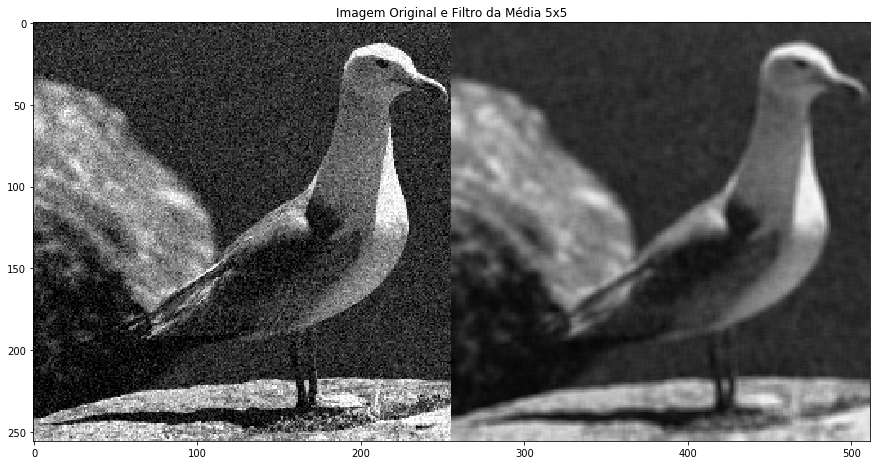

In [26]:
plt.figure(figsize=(15,15))
plt.title('Imagem Original e Filtro da Média 5x5')
img5x5 = cv2.blur(img,(5,5))
showfig(np.hstack([img, img5x5]),"gray")
print("Mean Squared Error:",mse(img,img5x5))

Mean Squared Error: 2661.9859313964844


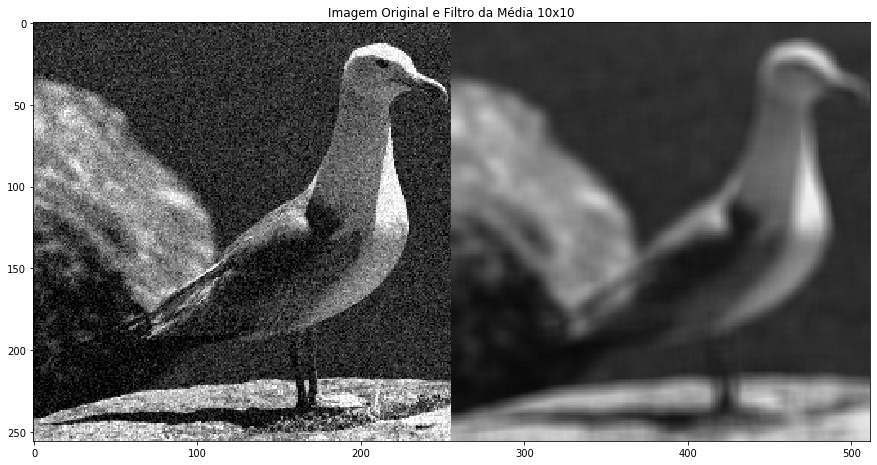

In [27]:
plt.figure(figsize=(15,15))
plt.title('Imagem Original e Filtro da Média 10x10')
img10x10 = cv2.blur(img,(10,10))
showfig(np.hstack([img, img10x10]),"gray")
print("Mean Squared Error:",mse(img,img10x10))

Mean Squared Error: 3904.8113708496094


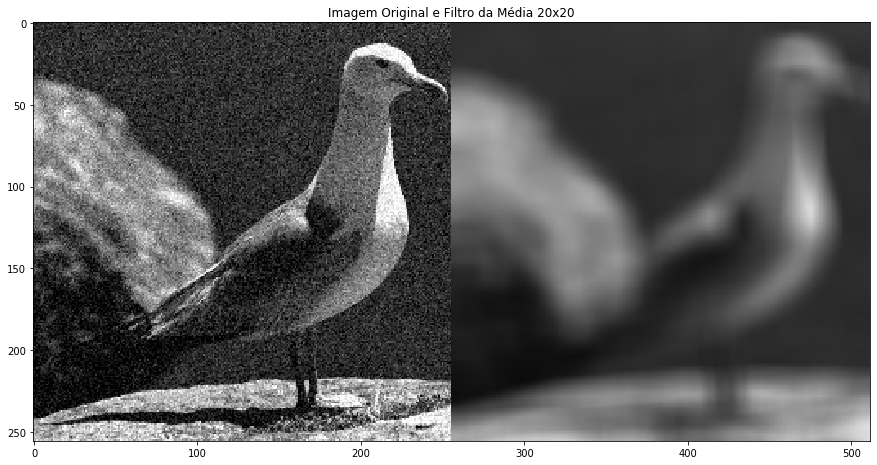

In [28]:
plt.figure(figsize=(15,15))
plt.title('Imagem Original e Filtro da Média 20x20')
img20x20 = cv2.blur(img,(20,20))
showfig(np.hstack([img, img20x20]),"gray")
print("Mean Squared Error:",mse(img,img20x20))

### Exercício 2
Utilizando a mesma imagem, “NoisyGull.pgm”, desenvolva um algoritmo para o filtro mediano com kernel de tamanho 3×3, 5×5 e 7×7. Apresente os resultados e quantifique-os através do erro médio quadrático.

Mean Squared Error: 1412.9606323242188


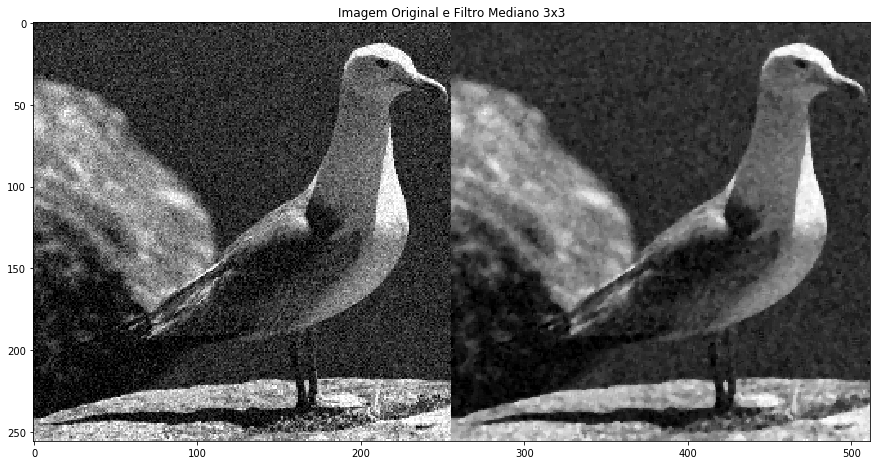

In [33]:
plt.figure(figsize=(15,15))
plt.title('Imagem Original e Filtro Mediano 3x3')
img3x3 = cv2.medianBlur(img,3)
showfig(np.hstack([img, img3x3]),"gray")
print("Mean Squared Error:",mse(img,img3x3))

Mean Squared Error: 1681.2393493652344


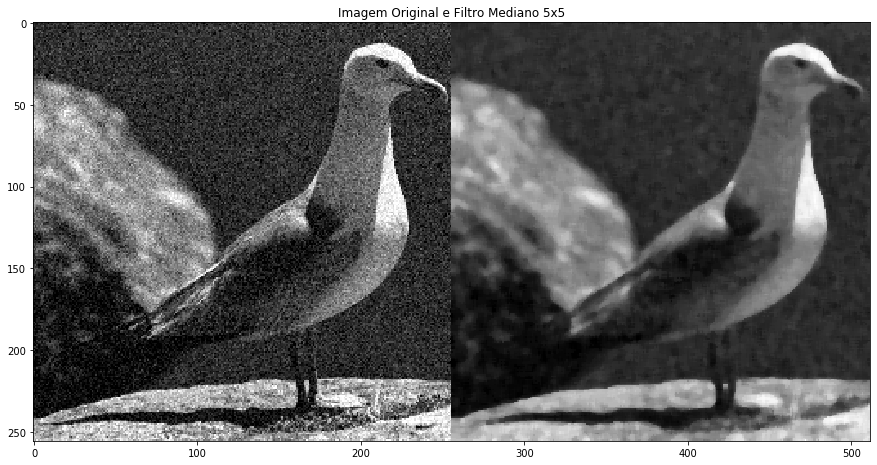

In [34]:
plt.figure(figsize=(15,15))
plt.title('Imagem Original e Filtro Mediano 5x5')
img5x5 = cv2.medianBlur(img,5)
showfig(np.hstack([img, img5x5]),"gray")
print("Mean Squared Error:",mse(img,img5x5))

Mean Squared Error: 1909.526870727539


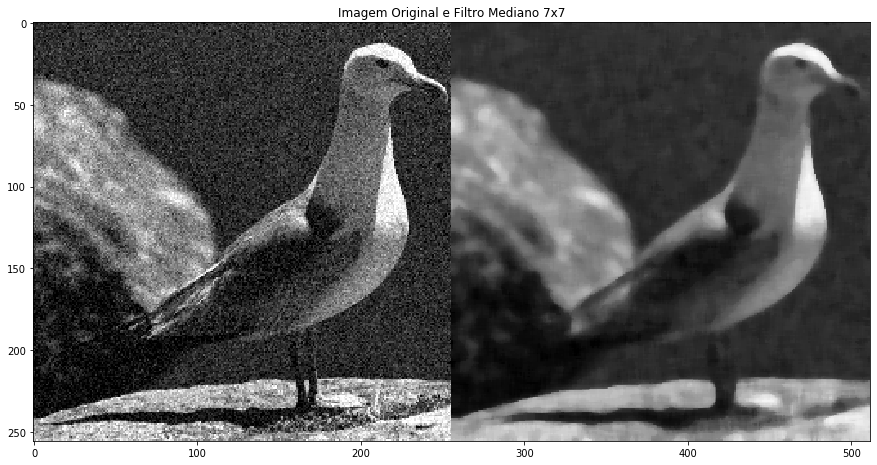

In [36]:
plt.figure(figsize=(15,15))
plt.title('Imagem Original e Filtro Mediano 7x7')
img7x7 = cv2.medianBlur(img,7)
showfig(np.hstack([img, img7x7]),"gray")
print("Mean Squared Error:",mse(img,img7x7))

### Exercício 3
Calcule a filtragem espacial para a seguinte imagem:

Imagem
<pre>
0 1 2 3 5 
1 2 3 5 7 
2 3 5 7 8
3 5 7 8 9
5 7 8 9 10
</pre>

Kernel
<pre>
1 1 1
1 2 1 
1 1 1
</pre>

In [40]:
kernel = np.array([[1,1,1],[1,2,1],[1,1,1]], dtype=int)
img = np.array([[0,1,2,3,5],[1,2,3,5,7],[2,3,5,7,8],[3,5,7,8,9],[5,7,8,9,10]])

def myCorrelation(image, kernel, bias):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
    return new_image.astype(np.uint8)

In [47]:
# Correlação
print(myCorrelation(img,kernel,0))

[[21 34 50]
 [34 50 66]
 [50 66 79]]


In [46]:
# Convolução
import scipy.signal
print(scipy.signal.convolve2d(img, kernel, 'valid'))

[[21 34 50]
 [34 50 66]
 [50 66 79]]


### Exercício 4
Implemente um algoritmo do filtro Sobel pela combinação de kernel nas direções x e y. Aplique sobre diferentes imagens e observe os resultados. Em seguida, implemente o filtro Laplaciano usando um dos kernels apresentados. Aplique-o sobre as mesmas imagens usadas para o filtro Sobel e observe os resultados. Finalmente, discuta as diferenças entre as técnicas.

(Text(0.5, 1.0, 'Imagem 2'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

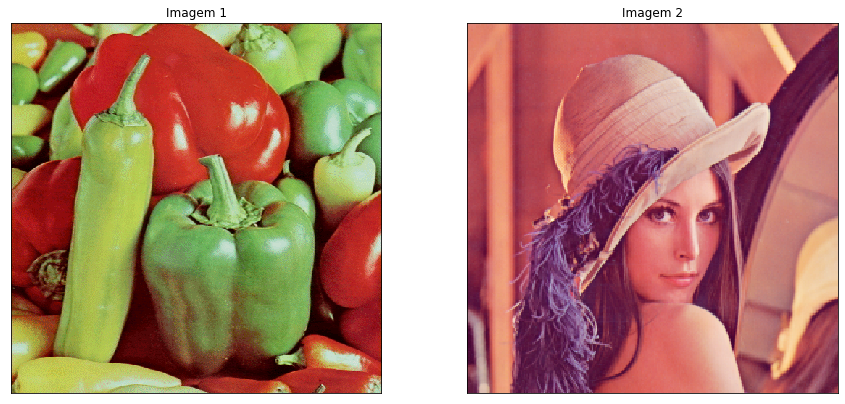

In [85]:
img = cv2.imread('peppers_color.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('lena_color_256.tif')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,15))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Imagem 1'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img2,cmap = 'gray')
plt.title('Imagem 2'), plt.xticks([]), plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

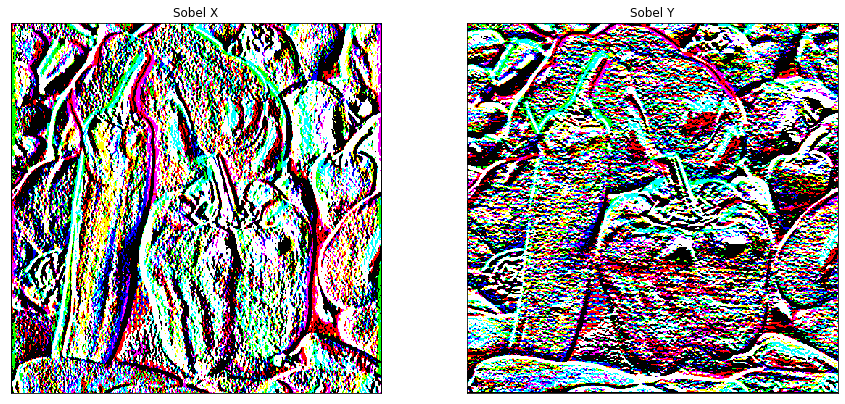

In [80]:
#imgSp1 = scipy.ndimage.sobel(img)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.figure(figsize=(15,15))
plt.subplot(2,2,1),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.sobel.html

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

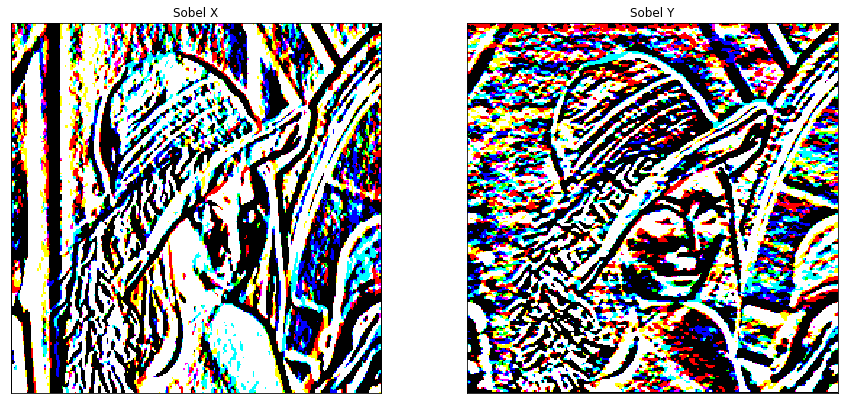

In [81]:
#imgSp1 = scipy.ndimage.sobel(img)
sobelx = cv2.Sobel(img2,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img2,cv2.CV_64F,0,1,ksize=5)
plt.figure(figsize=(15,15))
plt.subplot(2,2,1),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Laplacian'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

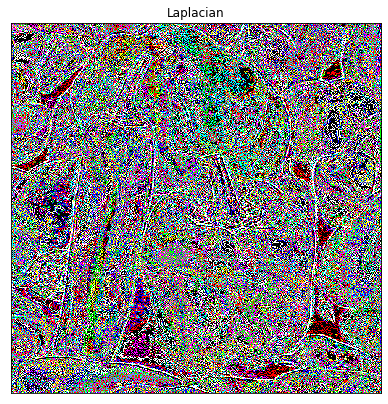

In [82]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
plt.figure(figsize=(15,15))
plt.subplot(2,2,1),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Laplacian'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

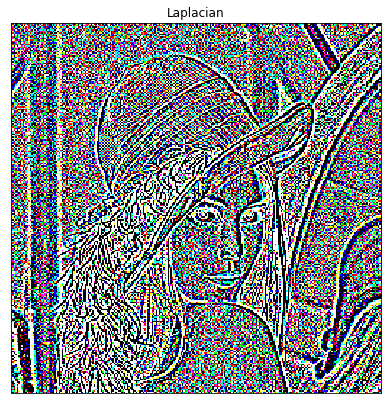

In [83]:
laplacian = cv2.Laplacian(img2,cv2.CV_64F)
plt.figure(figsize=(15,15))
plt.subplot(2,2,1),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

Os dois são filtros de detecção de bordas. No caso da imagem 1, achei que o filtro Laplaciano se saiu muito mal, mas acredito que isso tenha mais a ver com a imagem em si. O filtro Sobel foi bem nas duas, mas achei a imagem 2 com filtro Laplaciano a melhor de todas.

#### Vejam algumas aplicações usando cv2

* http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html
* https://www.pyimagesearch.com/practical-python-opencv/